In [3]:
import sys
import warnings
# 忽略所有警告
warnings.filterwarnings('ignore')
sys.path.append('/Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision')
import glaucoma_vision
import os
import torch
from glaucoma_vision.utils.dl_utils import (
    get_device,
    preprocess_dl_image,
    load_dl_model,
    GlaucomaDLDataset,
    dl_model_inference
)


In [4]:
WEIGHTS_DIR = "/Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights" 
VAL_DIR='/Users/apple/Desktop/BIA 4/Fundus_Scanes_Sorted/Validation'
CSV_PATH='/Users/apple/Desktop/BIA 4/glaucoma.csv.xls'

[ResNet-18 Evaluator] Using device: cpu
[ResNet-18 Evaluator] Loading validation dataset...
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
[ResNet-18 Evaluator] Loading model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/resnet18.pth...
[ResNet-18 Evaluator] Model loaded successfully.
[ResNet-18 Evaluator] Running inference on validation set...

ResNet-18 Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative     0.8500    0.7083    0.7727        96
Glaucoma_Positive     0.4400    0.6471    0.5238        34

         accuracy                         0.6923       130
        macro avg     0.6450    0.6777    0.6483       130
     weighted avg     0.7428    0.6923    0.7076       130

ResNet-18 Summary Metrics:
Accuracy Score: 0.6923
AUROC Score: 0.7059
AUPRC Score: 0.4080
Confusion Matrix -> TP: 22, TN: 68, FP:

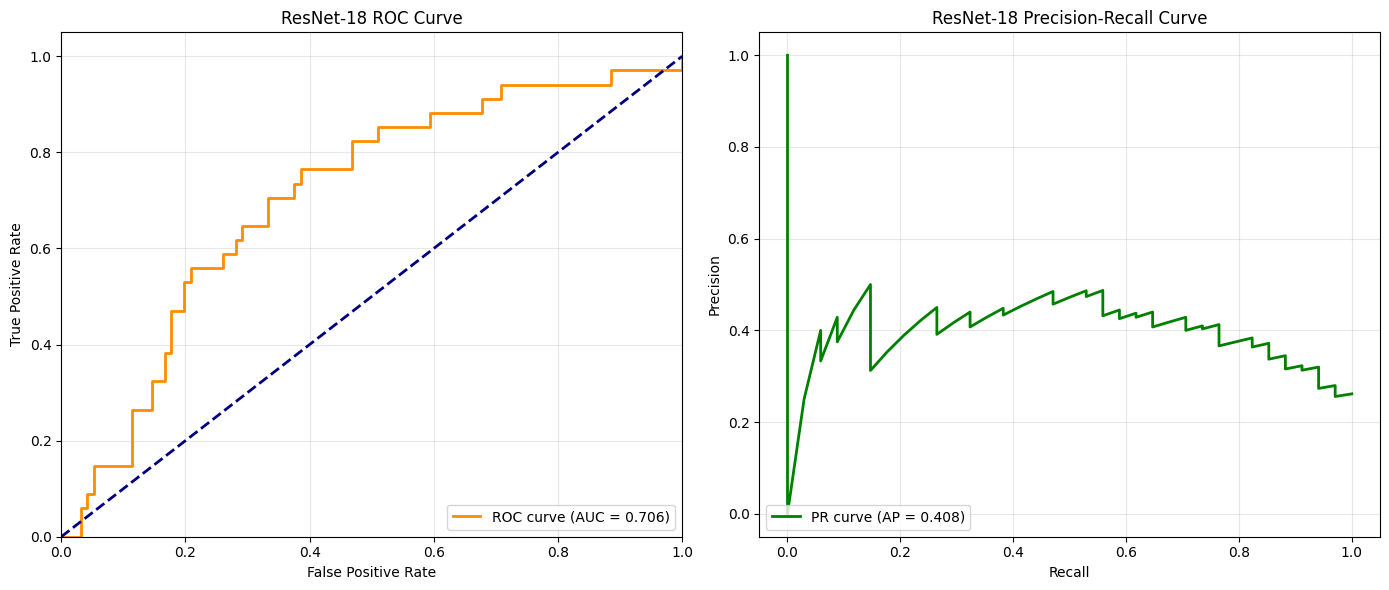

In [9]:
from glaucoma_vision.models.dl.evaluate_resnet18 import evaluate_resnet18
RESNET18_PATH=os.path.join(WEIGHTS_DIR, 'resnet18.pth')
metrics = evaluate_resnet18(model_path= RESNET18_PATH, val_dir=VAL_DIR)

[DenseNet Evaluator] Using device: cpu
[DenseNet Evaluator] Loading model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/densenet.pth...
[DenseNet Evaluator] Model loaded successfully.
[DenseNet Evaluator] Running inference on test set: /Users/apple/Desktop/BIA 4/Fundus_Scanes_Sorted/Validation

Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative     0.8889    0.5833    0.7044        96
Glaucoma_Positive     0.4030    0.7941    0.5347        34

         accuracy                         0.6385       130
        macro avg     0.6459    0.6887    0.6195       130
     weighted avg     0.7618    0.6385    0.6600       130

Summary Metrics:
Accuracy Score: 0.6385
AUROC Score: 0.7022
AUPRC Score: 0.4057
Confusion Matrix -> TP: 27, TN: 56, FP: 40, FN: 7


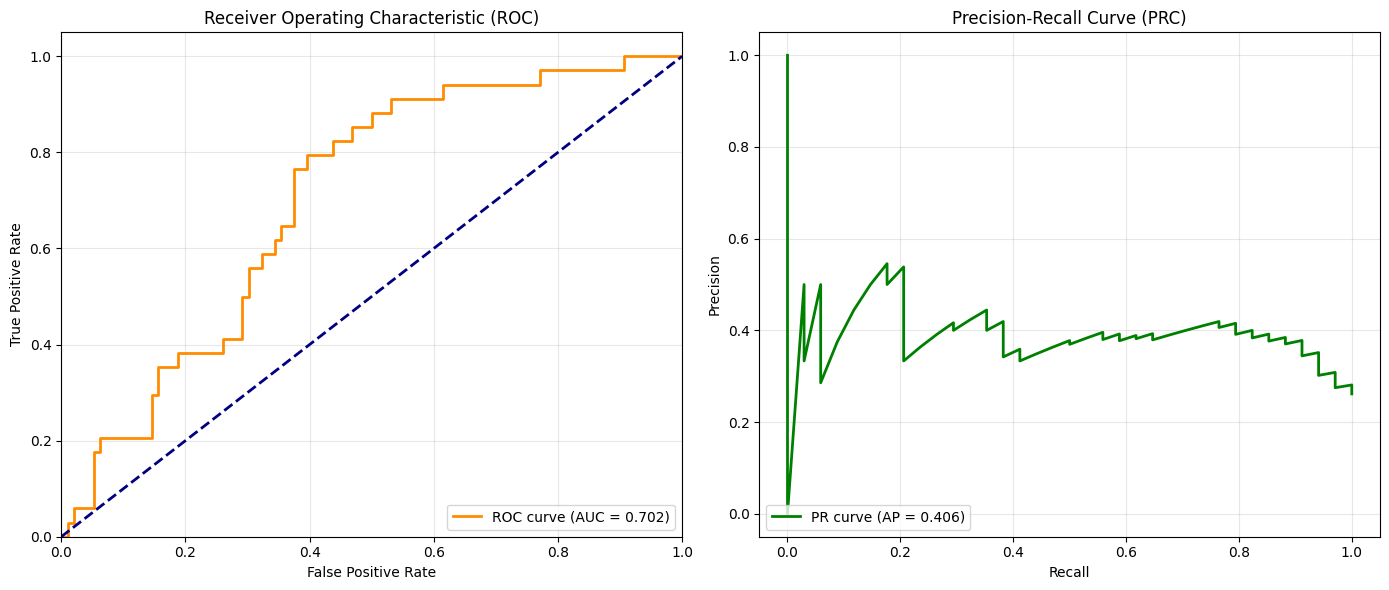

In [4]:
from glaucoma_vision.models.dl.evaluate_densenet import evaluate_densenet   
DENS_PATH=os.path.join(WEIGHTS_DIR, 'densenet.pth')
DENS_MATRIX=evaluate_densenet(DENS_PATH, VAL_DIR)

[ConvNeXt Evaluator] Loading validation dataset...
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
[ConvNeXt Evaluator] Loading model architecture and weights from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/convnext.pth...
[ConvNeXt Evaluator] Model loaded successfully.
[ConvNeXt Evaluator] Running inference on validation set...

Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative       0.83      0.77      0.80        96
Glaucoma_Positive       0.46      0.56      0.51        34

         accuracy                           0.72       130
        macro avg       0.65      0.66      0.65       130
     weighted avg       0.74      0.72      0.72       130

Summary Metrics:
Accuracy Score: 0.7154
AUROC Score: 0.7093
AUPRC Score: 0.4380
Confusion Matrix -> TP: 19, TN: 74, FP: 22, FN: 15


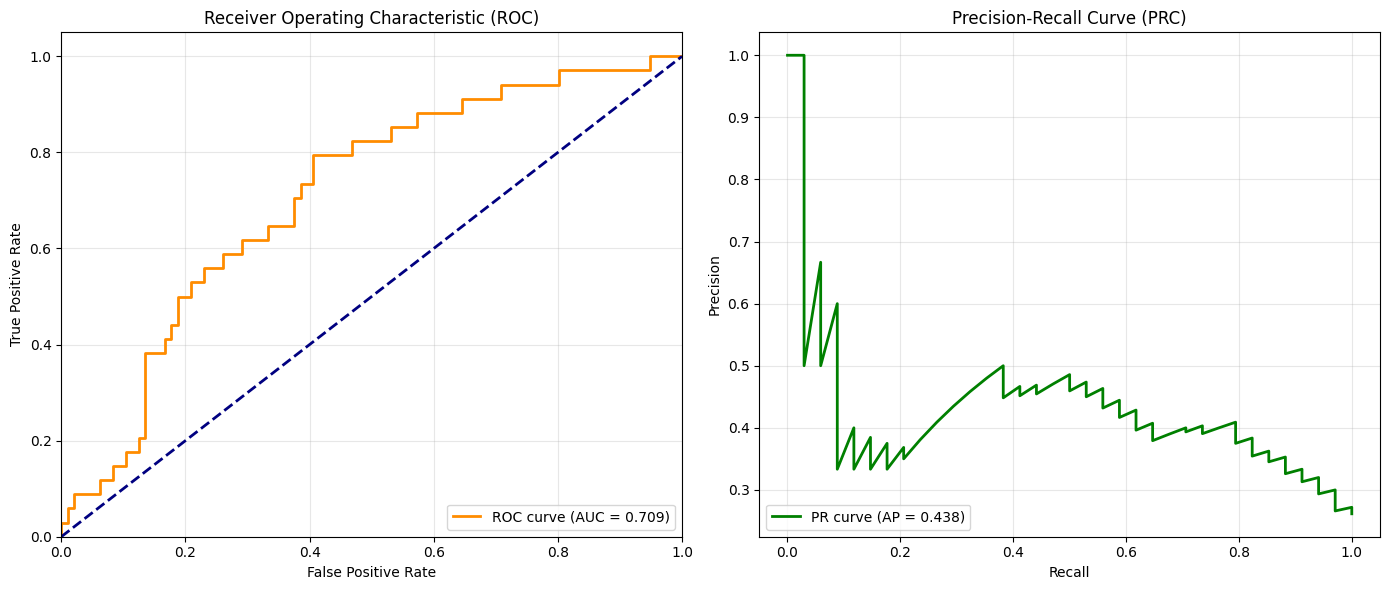

In [2]:
import os
from glaucoma_vision.models.dl.evaluate_convnext import evaluate_convnext
CONV_PATH=os.path.join(WEIGHTS_DIR, 'convnext.pth')
evaluate_convnext(CONV_PATH,VAL_DIR)

[MobileNetV2 Evaluator] Loading validation dataset...
Found 130 images belonging to 2 classes.
Validation Classes Mapping: {'Glaucoma_Negative': 0, 'Glaucoma_Positive': 1}
Validation Samples: 130
[MobileNetV2 Evaluator] Loading model architecture and weights from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/mobilenet_70.h5...
[MobileNetV2 Evaluator] Model loaded successfully.
[MobileNetV2 Evaluator] Running inference on validation set...

Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative       0.74      0.91      0.82        96
Glaucoma_Positive       0.31      0.12      0.17        34

         accuracy                           0.70       130
        macro avg       0.53      0.51      0.49       130
     weighted avg       0.63      0.70      0.65       130

Summary Metrics:
Accuracy Score: 0.7000
AUROC Score: 0.6415
AUPRC Score: 0.3425
Confusion Matrix -> TP

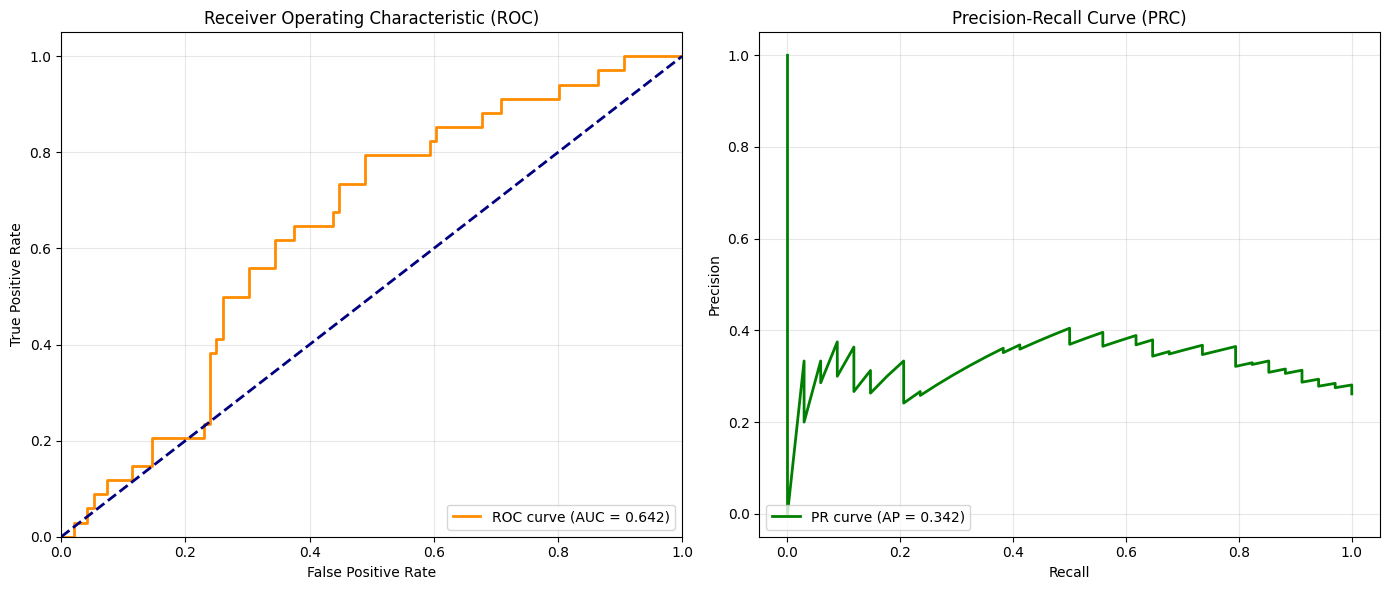

In [6]:
from glaucoma_vision.models.dl.evaluate_mobilenet import evaluate_mobilenet
MOBILE_PATH=os.path.join(WEIGHTS_DIR, 'mobilenet_70.h5')
metrics = evaluate_mobilenet(model_path=MOBILE_PATH, val_dir=VAL_DIR)

In [5]:
from glaucoma_vision.models.ml.evaluate_xgb import evaluate_xgb
XGB_PATH=os.path.join(WEIGHTS_DIR, 'xgb.json')
XGB_MATRIX=evaluate_xgb(XGB_PATH, VAL_DIR, CSV_PATH)

Extracting features: 100%|██████████| 650/650 [00:01<00:00, 589.63it/s] 

✅ Loaded 130 valid samples (Negative: 96, Positive: 34)

XGBOOST (IMAGE ONLY) - VALIDATION SET METRICS
Glaucoma_Negative F1 score : 0.9368
Glaucoma_Positive F1 score : 0.8286
Accuracy                     : 0.9077
AUROC Score                  : 0.9112
AUPRC Score                  : 0.8915

--------------------------------------------------
XGBoost Confusion Matrix (TN, FP, FN, TP)
--------------------------------------------------
                Predicted Negative  Predicted Positive
Actual Negative        89                   7         
Actual Positive        5                    29        

Confusion Matrix Values -> TP: 29, TN: 89, FP: 7, FN: 5



[SVM Evaluator] Reading CSV file...
[SVM Evaluator] Loading validation data from: /Users/apple/Desktop/BIA 4/Fundus_Scanes_Sorted/Validation ...
[SVM Evaluator]   Processing class 'Glaucoma_Negative': 96 images
[SVM Evaluator]   Processing class 'Glaucoma_Positive': 34 images
[SVM Evaluator] Validation Set Shape: (130, 7)
[SVM Evaluator] Loading SVM model from /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/svm.pkl...
[SVM Evaluator] Model loaded successfully.
[SVM Evaluator] Running inference...

SVM Classification Report
                   precision    recall  f1-score   support

Glaucoma_Negative     0.7664    0.8542    0.8079        96
Glaucoma_Positive     0.3913    0.2647    0.3158        34

         accuracy                         0.7000       130
        macro avg     0.5788    0.5594    0.5618       130
     weighted avg     0.6683    0.7000    0.6792       130


Confusion Matrix:
[[82 14]
 [25  9]]
Sum

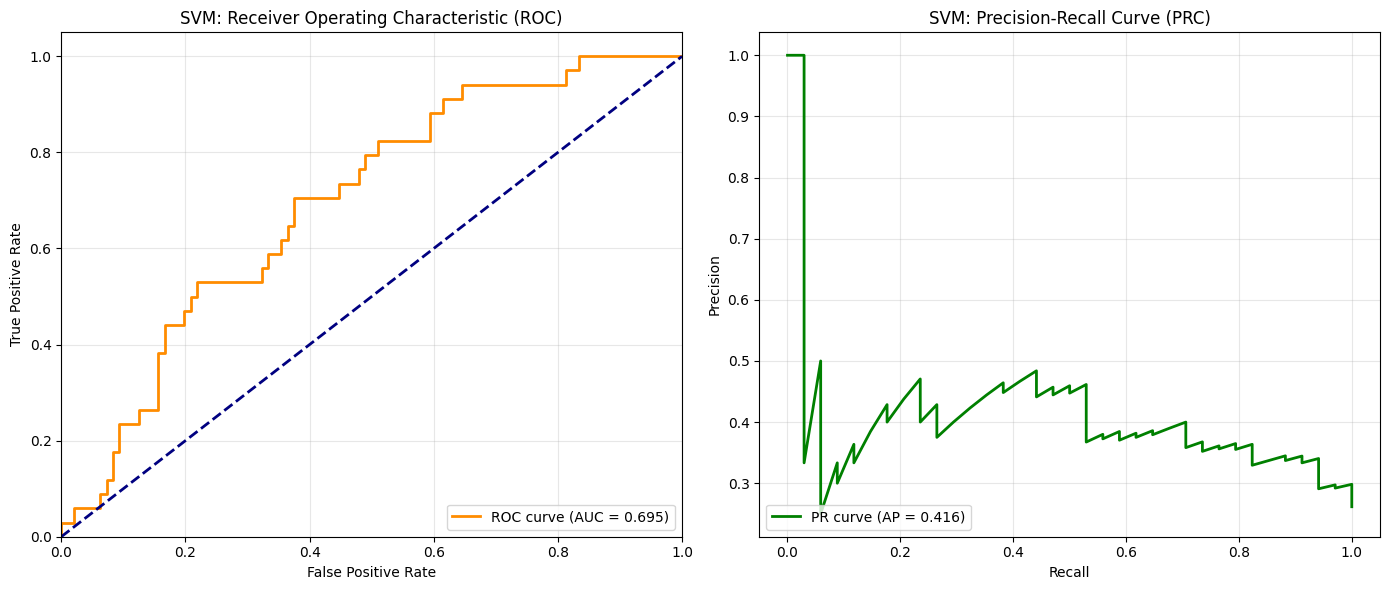

In [2]:
from glaucoma_vision.models.ml.evaluate_svm import evaluate_svm
SVM_PATH = os.path.join(WEIGHTS_DIR, 'svm.pkl')
VAL_DIR = '/Users/apple/Desktop/BIA 4/Fundus_Scanes_Sorted/Validation'
metrics = evaluate_svm(SVM_PATH, CSV_PATH, VAL_DIR)

[RF Evaluator] Starting Random Forest Evaluation Pipeline
[RF Evaluator] Loading model and dependencies...
✓ Model loaded from: /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/RF/random_forest_model.pkl
✓ Scaler loaded from: /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/RF/feature_scaler.pkl
✓ Feature info loaded from: /Users/apple/Desktop/Glaucoma-binary-classification-model-BIA-Group-Work-/glaucoma-vision/glaucoma_vision/models/weights/RF/feature_info.pkl

[RF Evaluator] Loading validation images and extracting features...
Validation set: 130 images (96 negative, 34 positive)
✓ Validation features shape: (130, 6)

[RF Evaluator] Running inference on validation set...
✓ Prediction completed!

Classification Report
              precision    recall  f1-score   support

Non-Glaucoma       0.77      0.90      0.83        96
    Glaucoma      

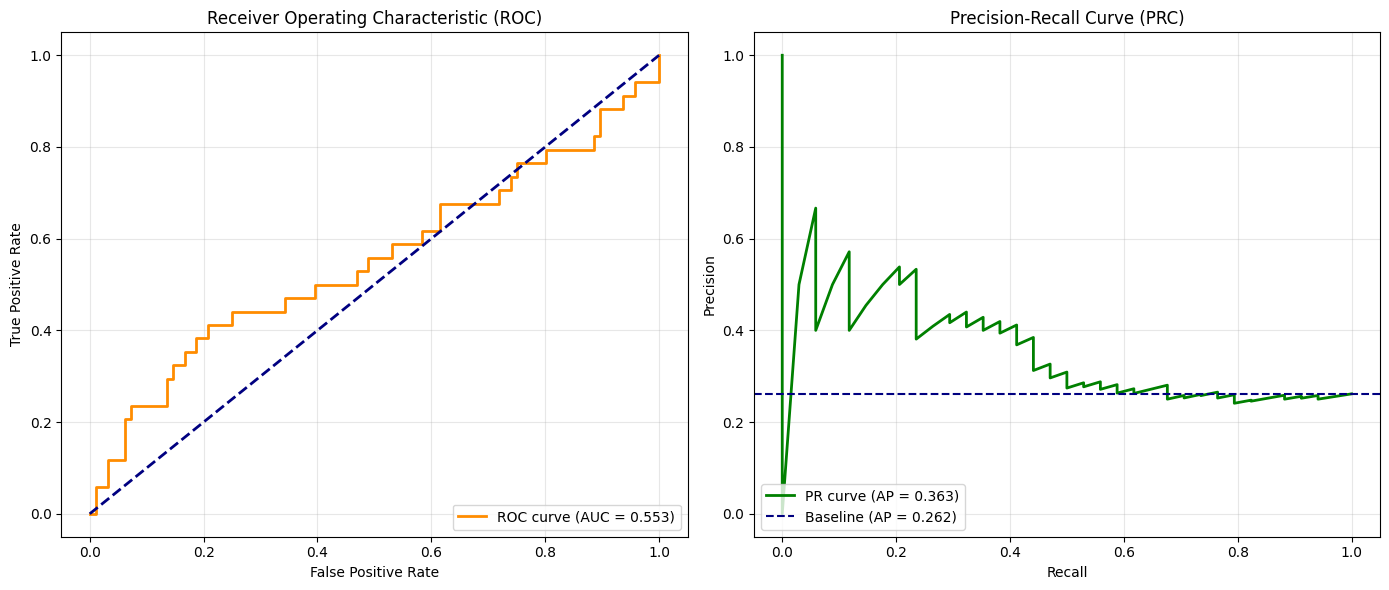


✅ [RF Evaluator] Evaluation completed successfully!


In [3]:
from glaucoma_vision.models.ml.evaluate_rf import evaluate_rf   
RF_PATH = os.path.join(WEIGHTS_DIR, 'RF')
rf_metrics = evaluate_rf(RF_PATH, VAL_DIR)
